## Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def clean_my_file(file_name):
    
    # read csv
    exp = pd.read_csv(file_name)
    # list of freqs
    
    list_of_freqs = exp.columns[12::].to_list()
    
    # index of first real freq
    index = list_of_freqs.index('-12')
    
    # normalize
    norm_factor = exp[ list_of_freqs[0:index-1] ].iloc[:,-1]
    
    raw_data = exp[ list_of_freqs[index::] ]
    
    # preallocate with zeros
    Zspectra = np.zeros(raw_data.shape)
    
    
    for i in range(raw_data.shape[0]):
        Zspectra[i,:] = raw_data.iloc[i,:] / norm_factor[i]
        
    
    #out[exp.columns[0:11].to_list()] = exp.columns[0:11].copy()
    
    out = exp[ exp.columns[0:11] ].copy()
    
    out['FILE']  = file_name.split('/NewMegaBox1to8_MLData_20200901/')[1]
    
    Z = pd.DataFrame(Zspectra, columns= list_of_freqs[index::])
    
    out[Z.columns] = Z.copy()
    
    return out
    


### Load data

In [3]:
%%time

import os
from glob import glob
PATH = "./NewMegaBox1to8_MLData_20200901"
EXT = "*.csv"
all_csv_files = [file
                 for path, subdir, files in os.walk(PATH)
                 for file in glob(os.path.join(path, EXT))]

data = pd.DataFrame()

for file in all_csv_files:
    exp = clean_my_file(file)
    data = pd.concat( (data,  exp), sort=False )
    

CPU times: user 1min 41s, sys: 13.9 s, total: 1min 55s
Wall time: 1min 56s


In [4]:
data.shape

(36000, 93)

In [5]:
data.columns

Index(['pH', 'Conc(mM)', 'ApproT1(sec)', 'ExpT1(ms)', 'ExpT2(ms)',
       'ExpB1(percent)', 'ExpB0(ppm)', 'ExpB0(Hz)', 'Temp', 'SatPower(uT)',
       'SatTime(ms)', 'FILE', '-12', '-11', '-10', '-9', '-6', '-3', '-2.75',
       '-2.5', '-2.25', '-2', '-1.8', '-1.6', '-1.4', '-1.2', '-1', '-0.8',
       '-0.6', '-0.4', '-0.2', '0', '0.2', '0.4', '0.6', '0.8', '1', '1.2',
       '1.4', '1.6', '1.8', '2', '2.2', '2.4', '2.6', '2.8', '3', '3.2', '3.3',
       '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2', '4.3',
       '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2', '5.3',
       '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2', '6.3',
       '6.4', '6.5', '6.6', '6.8', '7', '7.2', '7.4', '7.6', '7.8', '8', '9',
       '10', '11', '12'],
      dtype='object')

In [6]:
data.head(1).T

,0
pH,6.24
Conc(mM),9.987
ApproT1(sec),0.43
ExpT1(ms),402.7
ExpT2(ms),201.72
...,...
8,0.984906
9,0.984795
10,0.98435
11,0.984981


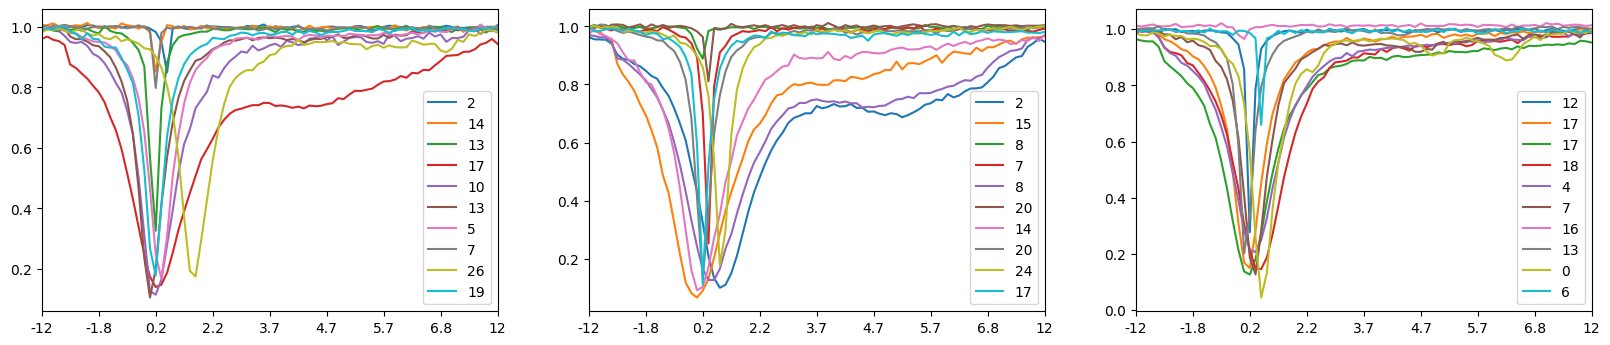

In [7]:
figure, axes = plt.subplots(1, 3)

figure.set_dpi(100)
figure.set_size_inches(20,4)

xdata = data.columns[12::].tolist()

data.sample(n=10)[xdata].T.plot(ax=axes[0])
data.sample(n=10)[xdata].T.plot(ax=axes[1])
data.sample(n=10)[xdata].T.plot(ax=axes[2])

In [8]:
pd.cut(data['ExpT1(ms)'])

TypeError: cut() missing 1 required positional argument: 'bins'

In [ ]:
data['SatPower(uT)'].unique()

In [ ]:
data.to_csv('acido_CEST_MRI_MegaBox_01_to_08_clean.csv')

In [ ]:
data[['pH', 'Conc(mM)', 'ApproT1(sec)', 'ExpT1(ms)', 'ExpT2(ms)',
       'ExpB1(percent)', 'ExpB0(ppm)', 'ExpB0(Hz)', 'Temp', 'SatPower(uT)',
       'SatTime(ms)', 'FILE']].iloc[24,:]